<a href="https://colab.research.google.com/github/The-WhiteCat/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and processing

In [ ]:
gld=pd.read_csv('/content/gld_price_data.csv')


In [ ]:
gld.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gld.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gld.shape

(2290, 6)

In [ ]:
gld.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gld.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


There are two types of correlation :
1. Positive correlation - when one value of a certain column in creases , same value of other column also increases.
2. Negative correlation - when one value of a certain column in creases , same value of other column also decreases.

In [ ]:
correlation=gld.corr()

<ipython-input-10-989d92380e13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gld.corr()


In [ ]:
print(correlation)
%matplotlib inline

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


Constructing a heatmap to understand the correlation.

<Axes: >

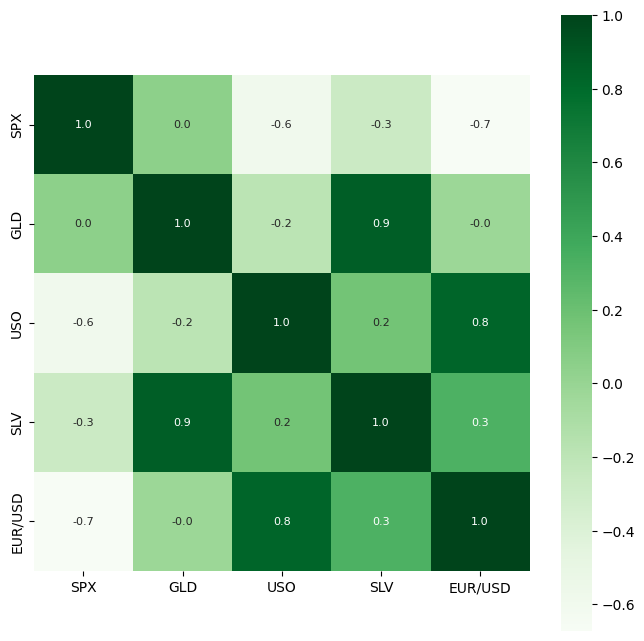

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Greens")

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


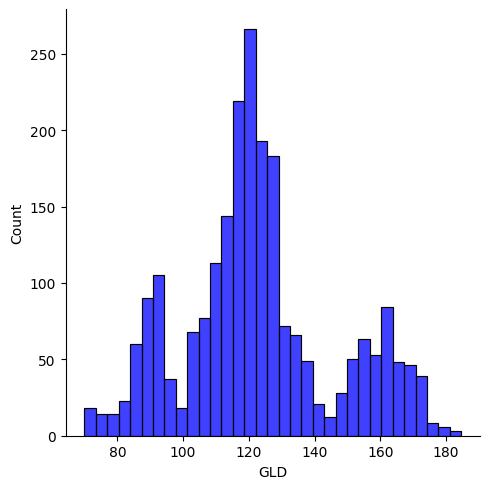

In [ ]:
sns.displot(gld['GLD'],color='blue')

Now seperating gold column and date column

In [ ]:
X=gld.drop(['Date','GLD'],axis=1)
Y=gld['GLD']

Splitting into training data and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training:
RANDOM FOREST

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
print(Y_train.dtype)
print(Y_test.dtype)

float64
float64


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(Y_train, regressor.predict(X_train))
mse_test = mean_squared_error(Y_test, regressor.predict(X_test))

print('Train data MSE: ', mse_train)
print('Test data MSE: ', mse_test)

Train data MSE:  0.8682848872122246
Test data MSE:  5.933302640734578


In [ ]:
test_pred=regressor.predict(X_test)

In [ ]:
print(test_pred)

[168.48709905  81.85520004 116.16280049 127.58420091 120.82010133
 154.55459725 150.25559871 126.11290016 117.58689859 126.17270042
 116.60600104 171.78100051 140.91169794 167.87129878 115.29300004
 117.73730025 138.6616034  170.06750084 159.83450311 157.86640019
 155.15380044 125.13730014 176.26439953 157.43890277 125.2266003
  93.8547998   77.50670036 120.6367003  119.0780991  167.40610031
  87.98830102 125.00819966  91.42510076 117.65350042 121.03929884
 136.5891012  115.74930097 115.10360063 149.15280014 107.40380077
 104.11910223  87.28039799 126.58880064 117.79310035 153.03759885
 119.66730029 108.39650021 108.02429865  93.13850031 127.10029777
  74.84950031 113.75109939 121.12430018 111.3093993  118.81589895
 120.879099   158.90110056 166.99610108 146.75999662  85.80089838
  94.40410043  86.76049866  90.70420018 118.82950088 126.48450052
 127.43859999 169.71049997 122.28609918 117.52179865  98.31220024
 168.25850086 142.83819847 132.24910234 121.28720229 121.21589911
 119.624700

R Squared error method

In [ ]:
error=metrics.r2_score(Y_test,test_pred)
print("R squared error : ",error)

R squared error :  0.988750828034885


Comparing the actual values and predicted values

In [ ]:
Y_test=list(Y_test)

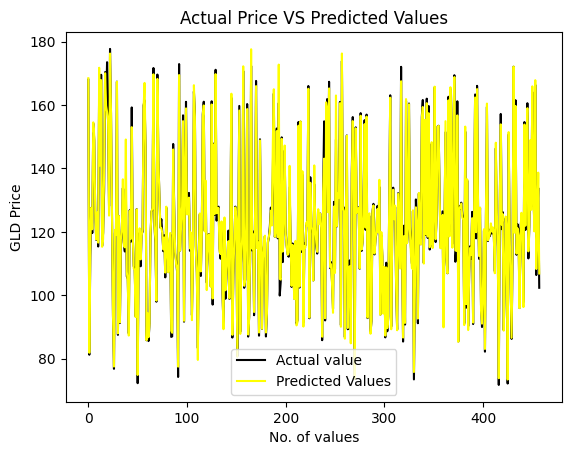

In [ ]:
plt.plot(Y_test,color='black',label='Actual value')
plt.plot(test_pred,color='yellow',label = 'Predicted Values')
plt.title('Actual Price VS Predicted Values')
plt.xlabel("No. of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

difference = [abs(a - p) for a, p in zip(Y_test, test_pred)]

scaler = MinMaxScaler(feature_range=(0, 1))
difference_normalized = scaler.fit_transform(np.array(difference).reshape(-1, 1)).flatten()

scaling_factor = 4.0
scaled_difference = scaling_factor * difference_normalized

trace_actual = go.Scatter3d(x=list(range(1, len(Y_test) + 1)), y=Y_test, z=scaled_difference,
                            mode='lines', name='Actual Values', line=dict(color='black'))

trace_predicted = go.Scatter3d(x=list(range(1, len(test_pred) + 1)), y=test_pred, z=scaled_difference,
                                mode='lines', name='Predicted Values', line=dict(color='yellow'))

layout = go.Layout(scene=dict(xaxis=dict(title='No. of values'),
                              yaxis=dict(title='GLD Price'),
                              zaxis=dict(title='Scaled Difference')),
                   title='Actual Price VS Predicted Values (3D)',
                   scene_aspectmode='manual')

fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)
fig.show()
